In [ ]:
from ipl_batting_stats
import player_stats
import matplotlib.pyplot as plt

## Main task is to generate list of highest achievers with respect to seasons

In [2]:
player_stats['V Kohli']['seasons'][2021]['stats']['Runs']

405

Text(0.5, 1.0, 'Rohit - Virat comparision')

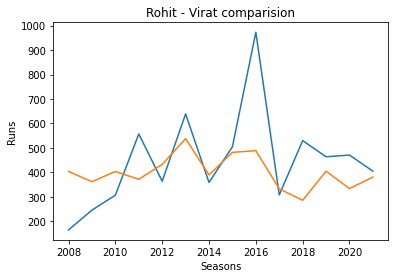

In [3]:
seasons = range(2008, 2022)
virat_runs = []
rohit_runs = []
for season in seasons:
    virat_runs.append(player_stats['V Kohli']['seasons'][season]['stats']['Runs'])
    rohit_runs.append(player_stats['RG Sharma']['seasons'][season]['stats']['Runs'])
plt.plot(seasons, virat_runs)
plt.plot(seasons, rohit_runs)
plt.xlabel('Seasons')
plt.ylabel('Runs')
plt.title('Rohit - Virat comparision')

2008
2018


Text(0.5, 1.0, 'Warner - Virat comparision')

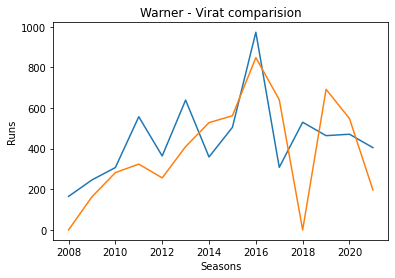

In [6]:
seasons = range(2008, 2022)
virat_runs = []
warner_runs = []
for season in seasons:
    try:
        virat_runs.append(player_stats['V Kohli']
                        ['seasons'][season]['stats']['Runs'])
        warner_runs.append(player_stats['DA Warner']
                        ['seasons'][season]['stats']['Runs'])
    except KeyError:
        print(season)
        warner_runs.append(0)
        continue
plt.plot(seasons, virat_runs)
plt.plot(seasons, warner_runs)
plt.xlabel('Seasons')
plt.ylabel('Runs')
plt.title('Warner - Virat comparision')


In [4]:
def last_n_seasons_attr(n, attr, top=10, final = 2022):
    seasons = range(final-n, final)
    pl_attr = {}
    for name in player_stats:
        attr_val = 0
        for season in seasons:
            if season not in player_stats[name]['seasons']:
                continue
            attr_val += player_stats[name]['seasons'][season]['stats'][attr]
        if attr in ('SR', 'Avg'):
            attr_val = round(attr_val/len(seasons), 2)
        pl_attr[name] = attr_val
    
    return sorted(list(pl_attr.keys()), key = lambda t:pl_attr[t], reverse=True)[:top],pl_attr

In [5]:
last_n_seasons_attr(3, 'Runs')[0]

['KL Rahul',
 'S Dhawan',
 'F du Plessis',
 'DA Warner',
 'V Kohli',
 'Q de Kock',
 'RR Pant',
 'SA Yadav',
 'AB de Villiers',
 'Shubman Gill']

In [6]:
# get every stat for the last 3 seasons
for stat in  player_stats['V Kohli']['seasons'][2021]['stats']:
    print(stat,last_n_seasons_attr(3, stat)[0])

Inns ['S Dhawan', 'RR Pant', 'SA Yadav', 'V Kohli', 'Shubman Gill', 'PP Shaw', 'Q de Kock', 'N Rana', 'AT Rayudu', 'KD Karthik']
Runs ['KL Rahul', 'S Dhawan', 'F du Plessis', 'DA Warner', 'V Kohli', 'Q de Kock', 'RR Pant', 'SA Yadav', 'AB de Villiers', 'Shubman Gill']
Balls ['KL Rahul', 'S Dhawan', 'F du Plessis', 'DA Warner', 'V Kohli', 'Q de Kock', 'Shubman Gill', 'SS Iyer', 'RR Pant', 'RG Sharma']
Dots ['KL Rahul', 'S Dhawan', 'Q de Kock', 'F du Plessis', 'Shubman Gill', 'DA Warner', 'RG Sharma', 'SS Iyer', 'N Rana', 'V Kohli']
Out ['S Dhawan', 'PP Shaw', 'RG Sharma', 'SA Yadav', 'V Kohli', 'Q de Kock', 'Shubman Gill', 'N Rana', 'RR Pant', 'F du Plessis']
4s ['S Dhawan', 'KL Rahul', 'SA Yadav', 'F du Plessis', 'PP Shaw', 'DA Warner', 'Q de Kock', 'Shubman Gill', 'MA Agarwal', 'V Kohli']
6s ['KL Rahul', 'AD Russell', 'CH Gayle', 'AB de Villiers', 'KA Pollard', 'HH Pandya', 'SV Samson', 'Q de Kock', 'F du Plessis', 'N Rana']
SR ['AD Russell', 'MK Lomror', 'DJ Bravo', 'SM Curran', 'KA 

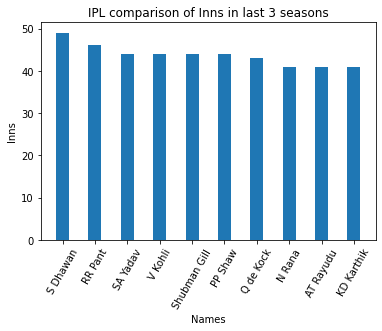

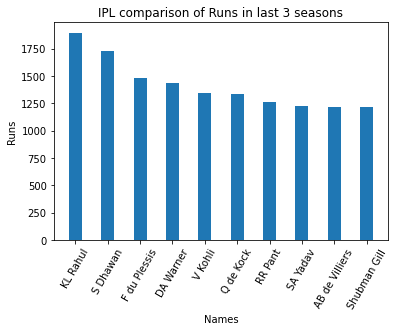

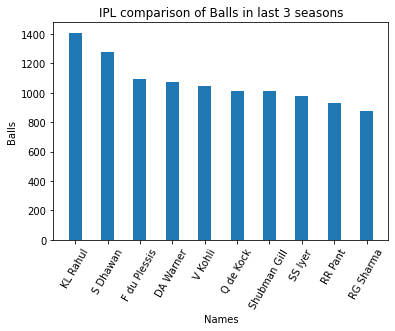

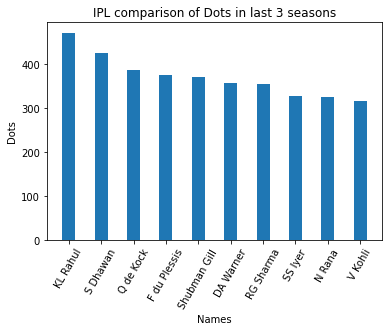

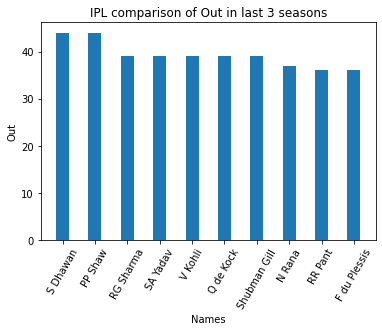

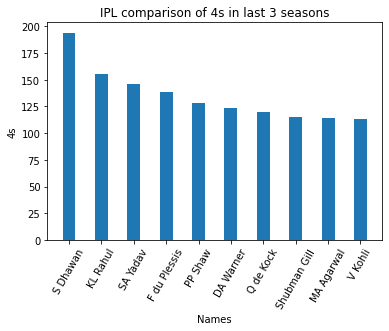

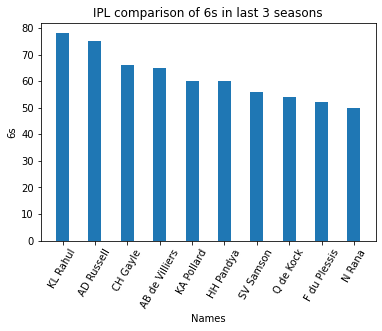

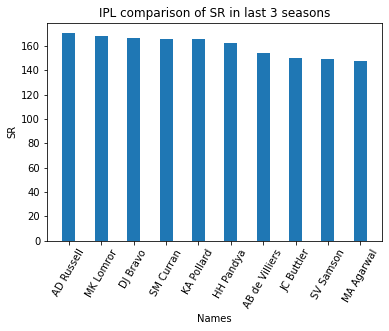

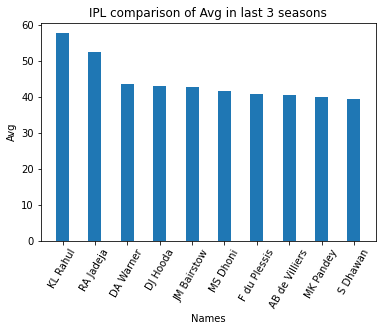

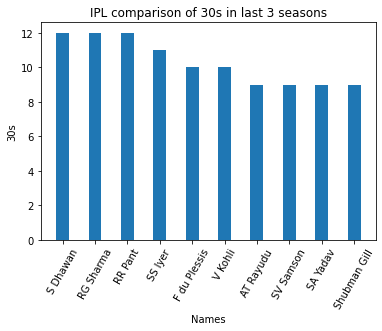

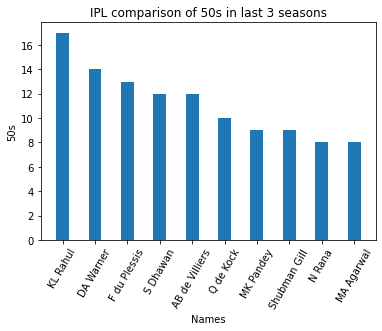

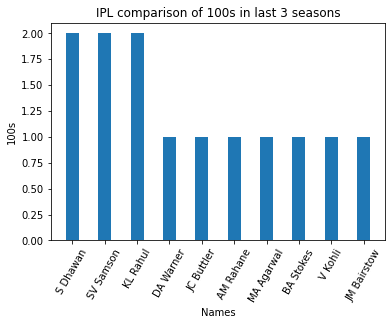

In [7]:
for stat in  player_stats['V Kohli']['seasons'][2021]['stats']:
    # top_num = 20
    # gt_attr = 'Runs'
    # gt_val = 1000
    n = 3
    names, pl_attr = last_n_seasons_attr(n, stat)
    values = [pl_attr[name] for name in names]

    plt.bar(range(len(names)), values, tick_label=names, width=0.4)
    plt.xticks(rotation=60)
    plt.xlabel('Names')
    plt.ylabel(stat)
    plt.title(
        f'IPL comparison of {stat} in last {n} seasons')
    # plt.figure(figsize=(10, 5))
    plt.show()


In [8]:
# get avg+sr
pl_avg_sr = {}
n = 3
sr = last_n_seasons_attr(n, 'SR')[1]
avg = last_n_seasons_attr(n, 'Avg')[1]
for name in sr:
    if name in avg:
        pl_avg_sr[name] = sr[name]+avg[name]


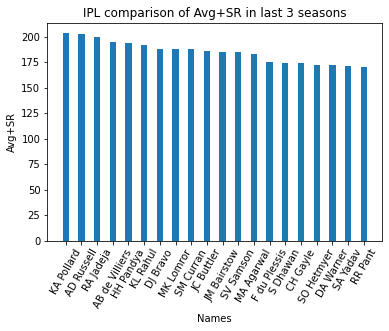

In [9]:
names = sorted(list(pl_avg_sr.keys()), key = lambda t: pl_avg_sr[t], reverse=True)[:20]
vals = [pl_avg_sr[name] for name in names]
plt.bar(range(len(names)), vals, tick_label=names, width=0.4)
plt.xticks(rotation=60)
plt.xlabel('Names')
plt.ylabel('Avg+SR')
plt.title(
    f'IPL comparison of Avg+SR in last {n} seasons')
# plt.figure(figsize=(10, 5))
plt.show()

In [10]:
# Highest score in every season
hs = []
for season in range(2008, 2022):
    hs_name = 'V Kohli'
    hs_score = 0
    for name in player_stats:
        if season not in player_stats[name]['seasons']:
            continue
        for match in player_stats[name]['seasons'][season]['matches']:
            if hs_score < match['Runs']:
                hs_score = match['Runs']
                hs_name = name
    hs.append((hs_name, hs_score))
for season, high in zip(range(2008, 2022),hs):
    print(season,':', high)

2008 : ('BB McCullum', 158)
2009 : ('MK Pandey', 114)
2010 : ('M Vijay', 127)
2011 : ('PC Valthaty', 120)
2012 : ('CH Gayle', 128)
2013 : ('CH Gayle', 175)
2014 : ('V Sehwag', 122)
2015 : ('AB de Villiers', 133)
2016 : ('AB de Villiers', 129)
2017 : ('DA Warner', 126)
2018 : ('RR Pant', 128)
2019 : ('JM Bairstow', 114)
2020 : ('KL Rahul', 132)
2021 : ('JC Buttler', 124)


In [11]:
player_stats['PC Valthaty']

{'career': {'Inns': 23,
  'Runs': 505,
  'Balls': 414,
  'Dots': 215,
  'Out': 22,
  '4s': 61,
  '6s': 20,
  'SR': 121.98,
  'Avg': 22.95,
  '30s': 2,
  '50s': 2,
  '100s': 1},
 'seasons': {2009: {'matches': [{'Runs': 5,
     'Balls': 7,
     'Dots': 5,
     'Out': 1,
     '4s': 1,
     '6s': 0},
    {'Runs': 1, 'Balls': 5, 'Dots': 4, 'Out': 1, '4s': 0, '6s': 0}],
   'stats': {'Inns': 2,
    'Runs': 6,
    'Balls': 12,
    'Dots': 9,
    'Out': 2,
    '4s': 1,
    '6s': 0,
    'SR': 50.0,
    'Avg': 3.0,
    '30s': 0,
    '50s': 0,
    '100s': 0}},
  2011: {'matches': [{'Runs': 6,
     'Balls': 6,
     'Dots': 4,
     'Out': 1,
     '4s': 1,
     '6s': 0},
    {'Runs': 120, 'Balls': 63, 'Dots': 15, 'Out': 0, '4s': 19, '6s': 2},
    {'Runs': 75, 'Balls': 45, 'Dots': 21, 'Out': 1, '4s': 8, '6s': 5},
    {'Runs': 46, 'Balls': 29, 'Dots': 14, 'Out': 1, '4s': 4, '6s': 3},
    {'Runs': 14, 'Balls': 10, 'Dots': 7, 'Out': 1, '4s': 0, '6s': 2},
    {'Runs': 7, 'Balls': 8, 'Dots': 5, 'Out': 1, '

2009:163 ;2010:282 ;2011:324 ;2012:256 ;2013:410 ;2014:528 ;2015:562 ;2016:848 ;2017:641 ;2019:692 ;2020:548 ;2021:197 ;2022:65 ;

Text(0.5, 1.0, "David Warner's Runs")

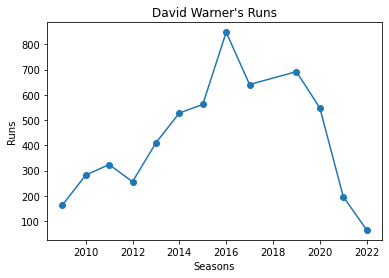

In [13]:
# David Warner's runs in each season
seasons = []
runs = []
for season in player_stats['DA Warner']['seasons']:
    seasons.append(season)
    runs.append(player_stats['DA Warner']['seasons'][season]['stats']['Runs'])
    print(season, player_stats['DA Warner']['seasons'][season]['stats']['Runs'], sep=':',end = ' ;')
plt.plot(seasons, runs, marker='o')
plt.xlabel('Seasons')
plt.ylabel('Runs')
plt.title('David Warner\'s Runs')

Text(0, 0.5, 'runs')

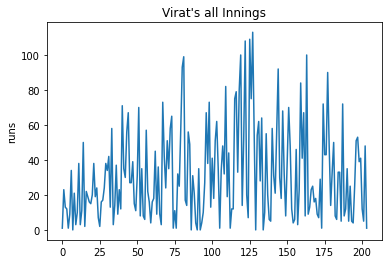

In [20]:
# virat Kohli every IPL innings
runs = []
for season in player_stats['V Kohli']['seasons']:
    for match in player_stats['V Kohli']['seasons'][season]['matches']:
        runs.append(match['Runs'])
plt.plot(runs)
plt.title('Virat\'s all Innings')
plt.ylabel('runs')


In [25]:
# Highest no. of all atrs in every season
for attr in list(player_stats['V Kohli']['seasons'][2021]['stats'].keys())[1:]:
    try:
        hs = []
        print(attr)
        for season in range(2008, 2022):
            hs_name = 'V Kohli'
            hs_score = 0
            for name in player_stats:
                if season not in player_stats[name]['seasons']:
                    continue
                for match in player_stats[name]['seasons'][season]['matches']:
                    if hs_score < match[attr]:
                        hs_score = match[attr]
                        hs_name = name
            hs.append((hs_name, hs_score))
        for season, high in zip(range(2008, 2022),hs):
            print(season,':', high)
    except KeyError as e:
        print(e)

Runs
2008 : ('BB McCullum', 158)
2009 : ('MK Pandey', 114)
2010 : ('M Vijay', 127)
2011 : ('PC Valthaty', 120)
2012 : ('CH Gayle', 128)
2013 : ('CH Gayle', 175)
2014 : ('V Sehwag', 122)
2015 : ('AB de Villiers', 133)
2016 : ('AB de Villiers', 129)
2017 : ('DA Warner', 126)
2018 : ('RR Pant', 128)
2019 : ('JM Bairstow', 114)
2020 : ('KL Rahul', 132)
2021 : ('JC Buttler', 124)
Balls
2008 : ('BB McCullum', 73)
2009 : ('MK Pandey', 73)
2010 : ('DA Warner', 68)
2011 : ('SR Tendulkar', 66)
2012 : ('AM Rahane', 66)
2013 : ('CH Gayle', 65)
2014 : ('AJ Finch', 62)
2015 : ('RG Sharma', 65)
2016 : ('V Kohli', 63)
2017 : ('BA Stokes', 63)
2018 : ('KL Rahul', 69)
2019 : ('CH Gayle', 64)
2020 : ('KL Rahul', 68)
2021 : ('JC Buttler', 63)
Dots
2008 : ('SE Marsh', 26)
2009 : ('DJ Bravo', 29)
2010 : ('BB McCullum', 25)
2011 : ('PC Valthaty', 25)
2012 : ('RG Sharma', 25)
2013 : ('DR Smith', 29)
2014 : ('AJ Finch', 29)
2015 : ('CH Gayle', 25)
2016 : ('M Vijay', 22)
2017 : ('RA Tripathi', 22)
2018 : ('S Dh